<a href="https://colab.research.google.com/github/Swapn2/deep_learning/blob/main/feature_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df= df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

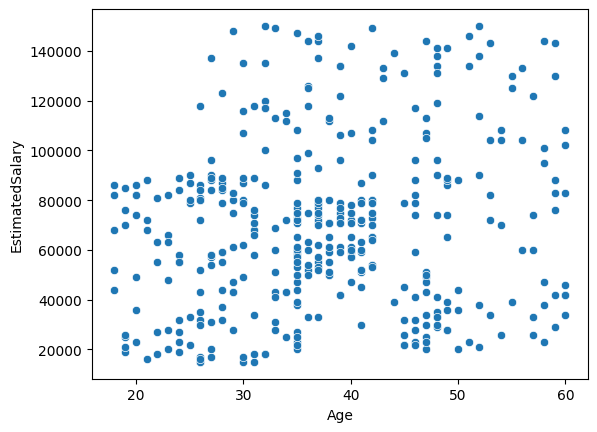

In [6]:
sns.scatterplot(x = df['Age'] , y = df['EstimatedSalary'])

In [7]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .2 , random_state = 2)

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [9]:
model = Sequential()

model.add(Dense(128 , activation = 'relu', input_dim = 2))
model.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer = 'adam',loss='binary_crossentropy' , metrics=['accuracy'])

In [13]:
history = model.fit(x_train,y_train,validation_data = (x_test,y_test), epochs = 100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.6808 - loss: 3608.9614 - val_accuracy: 0.6000 - val_loss: 1253.7028
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4986 - loss: 690.5535 - val_accuracy: 0.4000 - val_loss: 376.8366
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5144 - loss: 279.2645 - val_accuracy: 0.4000 - val_loss: 5.7639
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4892 - loss: 48.6156 - val_accuracy: 0.4000 - val_loss: 126.8774
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5379 - loss: 82.7426 - val_accuracy: 0.4000 - val_loss: 133.5039
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4548 - loss: 121.1263 - val_accuracy: 0.4000 - val_loss: 175.3623
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4353 - loss: 142.3053 - val_accuracy: 0.4000 - val_loss: 114.7020
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4061 - loss: 14

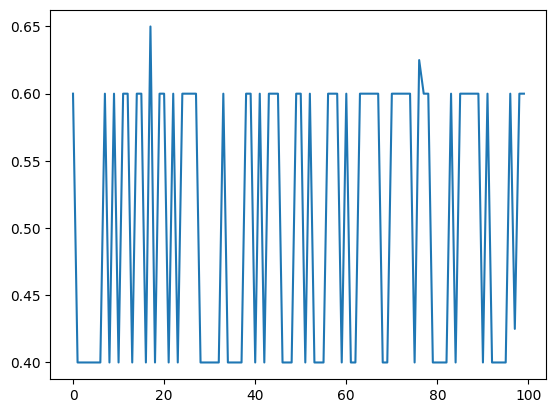

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [18]:
model = Sequential()

model.add(Dense(128 , activation = 'relu', input_dim = 2))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics =['accuracy'])

history = model.fit(x_train_scaled,y_train, validation_data= (x_test_scaled,y_test), epochs =100)


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.5228 - loss: 0.6817 - val_accuracy: 0.8000 - val_loss: 0.6335
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7448 - loss: 0.6280 - val_accuracy: 0.9125 - val_loss: 0.5801
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8491 - loss: 0.5792 - val_accuracy: 0.8500 - val_loss: 0.5336
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8614 - loss: 0.5339 - val_accuracy: 0.8250 - val_loss: 0.4937
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8787 - loss: 0.4995 - val_accuracy: 0.8250 - val_loss: 0.4597
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8676 - loss: 0.4758 - val_accuracy: 0.8500 - val_loss: 0.4299
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9104 - loss: 0.4181 - val_accuracy: 0.8375 - val_loss: 0.4030
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9105 - loss: 0.3942 - val_accuracy: 0.83

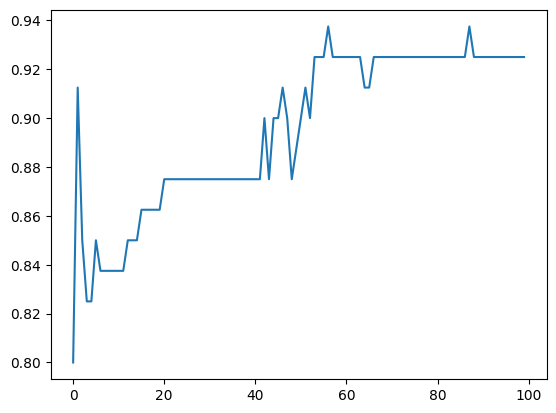

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])